# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import datetime
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('main_task.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


В трех столбцах есть пустые значения. В столбце где указана кухня заменяю все пустые значения на Cuisine, 
предполагая, что в ресторане представлена 1 тип кухни
В столбцах с ценовым сегментом и количеством отзывов пока заменяю на 0

In [5]:
df['Cuisine Style'] = df['Cuisine Style'].fillna('Cuisine')
df['Price Range'] = df['Price Range'].fillna(0)
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)

In [6]:
df['Price Range'].value_counts()

$$ - $$$    18412
0           13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

Так как в столбце Price Range всего 3 варианта непустых значений, добавляю столбец с их dummy переменными

In [7]:
price_range = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
df['Price Range Dummy'] = df['Price Range'].replace(to_replace=price_range)

In [8]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range Dummy
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2
1,id_1535,Stockholm,Cuisine,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3
3,id_3456,Berlin,Cuisine,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2


Добавила новый столбец с количеством кухонь в ресторане

In [9]:
pattern = re.compile('\w+\s*\w*\s*\w*[&]*\s*\w*')
df['Number of Cuisines'] = df['Cuisine Style'].apply(lambda x: len(pattern.findall(x)))

In [10]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range Dummy,Number of Cuisines
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3
1,id_1535,Stockholm,Cuisine,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3,7
3,id_3456,Berlin,Cuisine,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2,3


Добавила новый столбец с датами публикации отзывов

In [11]:
pattern = re.compile('\'\d+\/\d+\/\d+\'?')
df['Reviews Date'] = df['Reviews'].apply(lambda x: pattern.findall(x))

Создаю новый столбец со странами (возможно пригодится)

In [12]:
df['City'].value_counts()

country = {'London': 'England', 'Paris': 'France', 'Madrid': 'Spain', 'Barcelona': 'Spain', 
           'Berlin': 'Germany', 'Milan': 'Italy', 'Rome': 'Italy', 'Prague': 'Czech', 'Lisbon': 'Portugal',
           'Vienna': 'Austria', 'Amsterdam': 'Netherlands', 'Brussels': 'Belgium', 'Hamburg': 'Germany', 
           'Munich': 'Germany', 'Lyon': 'France', 'Stockholm': 'Sweden', 'Budapest': 'Hungary', 
           'Warsaw': 'Poland', 'Dublin': 'Ireland', 'Copenhagen': 'Denmark', 'Athens': 'Greece', 
           'Edinburgh': 'Scotland' , 'Zurich': 'Switzerland', 'Oporto': 'Portugal', 
           'Geneva': 'Switzerland', 'Krakow': 'Poland', 'Oslo': 'Norway', 'Helsinki': 'Finland', 
           'Bratislava': 'Slovakia', 'Luxembourg': 'Luxembourg', 'Ljubljana': 'Slovenia'}

df['Country'] = df['City'].replace(to_replace=country)

Взяла отсюда классификацию для стран Европы
https://ykl-shk.azureedge.net//goods/ymk/geography/work5/theory/10/geo_11.gif
    
Добавила новый столбец с принадлежностью к частью Европы, тк мне кажется это может 
быть важным при дальнейшем анализе

In [13]:
part_of_europe = {'Spain': 'Southern Europe', 'France': 'Western Europe', 'England': 'Western Europe', 
                  'Italy': 'Southern Europe', 'Germany': 'Western Europe', 'Portugal': 'Southern Europe', 
                  'Czech': 'Eastern Europe', 'Poland': 'Eastern Europe', 'Austria':  'Western Europe', 
                  'Netherlands': 'Western Europe', 'Belgium': 'Western Europe', 
                  'Switzerland': 'Western Europe', 'Sweden': 'Northern Europe',
                  'Hungary': 'Eastern Europe', 'Ireland': 'Western Europe', 'Denmark': 'Northern Europe', 
                  'Greece': 'Southern Europe', 'Scotland': 'Western Europe', 'Norway': 'Northern Europe', 
                  'Finland': 'Northern Europe', 'Slovakia': 'Eastern Europe', 
                  'Luxembourg': 'Western Europe', 'Slovenia': 'Southern Europe'}

df['Part of Europe'] = df['Country'].replace(to_replace=part_of_europe)

Заменяю категориальные признаки на числовые в новом столбце по частям Европы

In [14]:
part_of_eur = {'Southern Europe': 1, 'Western Europe': 2, 'Eastern Europe': 3, 'Northern Europe': 4}
df['Part of Europe Dummy'] = df['Part of Europe'].replace(to_replace=part_of_eur)

In [15]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Price Range Dummy,Number of Cuisines,Reviews Date,Country,Part of Europe,Part of Europe Dummy
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"['12/31/2017', '11/20/2017']",France,Western Europe,2
1,id_1535,Stockholm,Cuisine,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,"['07/06/2017', '06/19/2016']",Sweden,Northern Europe,4
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,3,7,"['01/08/2018', '01/06/2018']",England,Western Europe,2
3,id_3456,Berlin,Cuisine,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,1,[],Germany,Western Europe,2
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,2,3,"['11/18/2017', '02/19/2017']",Germany,Western Europe,2


Строю боксплоты для всех числовых столбцов, чтобы посмотреть на выбросы, в столбцах Ranking и Rating
есть выбросы, но думаю они соответствуют действительности

В столбце с количеством отзывов картинка гораздо страннее, есть рестораны с больше, чем 5000 отзывами
возможно накрутка или неправильно было заменять пустые значения на 0, тк их было достаточно много

c:\users\svetamira\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number of Reviews'>

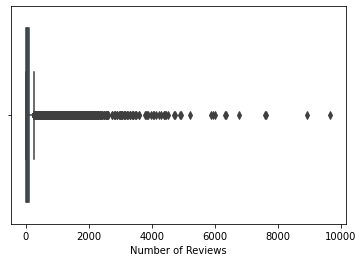

In [16]:
#sns.boxplot(df['Ranking'])
#sns.boxplot(df['Rating'])
sns.boxplot(df['Number of Reviews'])

Посмотрю отдельно на столбец с количеством отзывов со значением 0 и там где столбец Reviews не пуст
Замечаю что в уже в новом построенном столбце с датой отзыва, только одна дата
Заменю значение в столбце Number of Reviews как минимум на 1

In [20]:
df[(df['Reviews'] != '[[], []]') & (df['Number of Reviews'] == 0)]
df['Number of Reviews'] = np.where((df['Reviews'] != '[[], []]') & (df['Number of Reviews'] == 0), 1, df['Number of Reviews'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_id         40000 non-null  object 
 1   City                  40000 non-null  object 
 2   Cuisine Style         40000 non-null  object 
 3   Ranking               40000 non-null  float64
 4   Rating                40000 non-null  float64
 5   Price Range           40000 non-null  object 
 6   Number of Reviews     40000 non-null  float64
 7   Reviews               40000 non-null  object 
 8   URL_TA                40000 non-null  object 
 9   ID_TA                 40000 non-null  object 
 10  Price Range Dummy     40000 non-null  int64  
 11  Number of Cuisines    40000 non-null  int64  
 12  Reviews Date          40000 non-null  object 
 13  Country               40000 non-null  object 
 14  Part of Europe        40000 non-null  object 
 15  Part of Europe Dumm

Строю матрицу корреляций

In [38]:
corr_matrix = df.corr().abs()

In [41]:
corr_matrix
corr_matrix.style.background_gradient(cmap='coolwarm')

,Ranking,Rating,Number of Reviews,Price Range Dummy,Number of Cuisines,Part of Europe Dummy
Ranking,1.000000,0.368371,0.222030,0.243553,0.320250,0.126378
Rating,0.368371,1.000000,0.026938,0.051643,0.120059,0.007585
Number of Reviews,0.222030,0.026938,1.000000,0.312600,0.405599,0.066735
Price Range Dummy,0.243553,0.051643,0.312600,1.000000,0.565227,0.002361
Number of Cuisines,0.320250,0.120059,0.405599,0.565227,1.000000,0.026804
Part of Europe Dummy,0.126378,0.007585,0.066735,0.002361,0.026804,1.000000


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [26]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 
             'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 
             'Reviews Date', 'Country', 'Part of Europe', 'Rating'], axis = 1).fillna(0)
y = df['Rating']

In [27]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [28]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [29]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [30]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [48]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.3292527492063492


Вывод

Самая большая корреляция у признаков количество кухонь и ценовой сегмент
Самая низкая - часть Европы и ценовой сегмнт (хотя мне казалось что корреляция будет больше:()

Среднее отклонение за счет создания новых признаков снизилось, но незначительно

P.S. Думала сделать dummy переменные, по отдельным столбцам, например с частями Европы, но не поняла как добавлять несколько столбцов к уже существующему датафрейму :( Можете, пожалуйста, в фидбэке прислать код, как это делается
Может так результат был бы лучше